In [63]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [64]:
df = pd.read_excel('komari.xlsx')

In [65]:
df = df.rename(columns=
{
    '45' : 'col_0',
    '1' : 'col_1',
    '11' : 'col_2',
    '59.00' : 'col_3',
    '3.00' : 'col_4',
    '29.00' : 'col_5',
    '2.00' : 'col_6',
    '2' : 'col_7',
    '14' : 'col_8',
    '0' : 'col_9',
    '2_1' : 'col_2_1',
    '5' : 'col_10',
    'f' : 'col_f',
    '4' : 'col_12',
    '0_1' : 'col_0_1',
    '1_1' : 'col_1_1',
    '1_2' : 'col_1_2',
    '1_3' : 'col_1_3',
    '0_2' : 'col_0_2',
    '0_3' : 'col_0_3',
    '1_4' : 'col_1_4',
    '1_5' : 'col_1_5',
    '1_6' : 'col_1_6',
    '1_7' : 'col_1_7',
    '0_4' : 'col_0_4',
    '1_8' : 'col_1_8',
    '0_5' : 'col_0_5',
    '0_6' : 'col_0_6',
    '1_9' : 'col_1_9',
    '1_10' : 'col_1_10',
    '3.00_1' : 'col_3.00_1',
    '2_2' : 'col_2_2',
    '4_1' : 'col_4_1',
    '0.23934' : 'col_',
    'Column_35' : 'Column_35',
    '3' : 'col_13',
    '2.00_1' : 'col_2.00_1',
})

df = df.drop(columns=['Column_35'])

In [66]:
df['col_f'] = (df['col_f'] == 'f').map({True: 1, False: 0})

In [67]:
df_corr = df.corr()

In [68]:
for col_i in df_corr.columns:
    df_corr[col_i] = df_corr[col_i].apply(lambda x: x if abs(x) > 0.85 else pd.NA)


In [69]:
col_0_correlated_cols = df_corr[~pd.isna(df_corr['col_0'])].index.to_list()

In [70]:
df[col_0_correlated_cols].describe()

,col_0,col_3.00_1,col_,col_13,col_2.00_1
count,6399.000000,6399.000000,6399.000000,6399.000000,6399.000000
mean,42.058134,2.994999,-0.000037,3.139397,2.059228
std,12.290421,0.805561,1.000074,0.868113,0.672851
min,18.000000,1.000000,-1.957652,1.000000,1.000000
25%,33.000000,3.000000,-0.737099,3.000000,2.000000
50%,41.000000,3.000000,-0.086138,3.000000,2.000000
75%,51.000000,4.000000,0.727564,4.000000,3.000000
max,77.000000,4.000000,2.843188,5.000000,3.000000


In [71]:
df = df.drop(columns=['col_0', 'col_3.00_1', 'col_13','col_2.00_1'])

In [72]:
col_4_correlated_cols = df_corr[~pd.isna(df_corr['col_4'])].index.to_list()

In [73]:
df[col_4_correlated_cols].describe()

,col_4,col_5,col_6,col_2_2
count,6399.000000,6399.000000,6399.000000,6399.000000
mean,2.528364,30.128551,2.069230,2.208783
std,1.073903,21.928626,0.799962,1.243493
min,1.000000,4.200000,1.000000,1.000000
25%,2.000000,13.900000,1.000000,1.000000
50%,2.000000,22.200000,2.000000,2.000000
75%,4.000000,39.500000,3.000000,3.000000
max,4.000000,99.900000,3.000000,6.000000


In [74]:
df = df.drop(columns=['col_4', 'col_6', 'col_2_2'])

In [75]:
df_corr = df.corr()
for col_i in df_corr.columns:
    df_corr[col_i] = df_corr[col_i].apply(lambda x: x if abs(x) > 0.85 else pd.NA)

In [76]:
col_8_correlated_cols = df_corr[~pd.isna(df_corr['col_8'])].index.to_list()

In [77]:
df[col_8_correlated_cols].describe()

,col_8,col_2_1
count,6399.000000,6399.000000
mean,10.565713,1.938115
std,9.725123,0.791828
min,0.000000,1.000000
25%,3.000000,1.000000
50%,8.000000,2.000000
75%,16.000000,3.000000
max,57.000000,3.000000


In [78]:
df = df.drop(columns=['col_2_1'])

In [85]:
len(df.columns)

28

In [88]:
# for col in df.columns:
#     fig, axes = plt.subplots(7,4, figsize=(20,40))
# 
#     col_x = col
# 
#     for row_i in range(7):
#         for col_i in range(4):
#             index = row_i * 4 + col_i
# 
#             if index > len(df.columns) - 1:
#                 break
# 
#             col_y = df.columns[index]
# 
#             axes[row_i, col_i].scatter(df[col_x], df[col_y], s=5)
#             axes[row_i, col_i].set_xlabel(col_x)
#             axes[row_i, col_i].set_ylabel(col_y)
# 
# plt.tight_layout()
# plt.show()

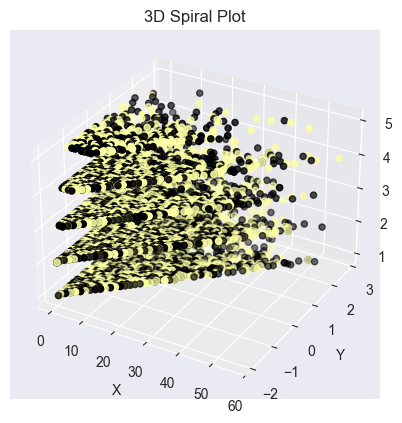

In [103]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['col_2'], df['col_'], df['col_7'], c = df['col_f'],cmap="inferno")
ax.set_title("3D Spiral Plot")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

plt.show()

In [105]:
binary_columns = [c for c in df.columns if len(df[c].value_counts()) == 2]

In [109]:
non_binary_columns = [c for c in df.columns if c not in binary_columns]

In [110]:
non_binary_columns

['col_2',
 'col_3',
 'col_5',
 'col_7',
 'col_8',
 'col_10',
 'col_12',
 'col_0_2',
 'col_4_1',
 'col_']